In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics.pairwise import cosine_similarity



Utility Functions

In [2]:
## utility functions 
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask


def load_model(name,do_lower_case=False):
    tokenizer = AutoTokenizer.from_pretrained(name,do_lower_case=False)
    model = AutoModel.from_pretrained(name)
    return model,tokenizer


def calc_embeddings(model,tokenizer,sentences):
    encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask']).numpy()
#     sentence_embeddings = (sentence_embeddings-np.mean(sentence_embeddings,axis=0)) / np.std(sentence_embeddings,axis=0)
    return sentence_embeddings

def plot_similarity(sentence_embeddings):
    labels = ['Sent1_en','Sent1_hi','Sent1_ta','Sent1_mr','Sent2_en','Sent2_hi','Sent2_ta','Sent2_mr']
    sns.set(font_scale=1.2)
    similarity = (1+cosine_similarity(sentence_embeddings))/2
    plt.figure(figsize=(14,14))
    ax = sns.heatmap(similarity, linewidth=0.5,annot=True,xticklabels= labels, yticklabels=labels)
    plt.show()




In [3]:
sentences = ['Can you please help me here?',
             'क्या आप कृपया यहाँ मेरी मदद कर सकते हैं?',
             'தயவுசெய்து எனக்கு இங்கு உதவ முடியுமா?','तुम्ही मला इथे मदत करू शकता का?',
             'Sure, what help do you need?','ज़रूर, आपको क्या मदद चाहिए?',
             'நிச்சயமாக, உங்களுக்கு என்ன உதவி தேவை?','नक्कीच, तुम्हाला कोणती मदत हवी आहे?']



LaBSE Embeddings

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.98M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.76G [00:00<?, ?B/s]

Some weights of the model checkpoint at pvl/labse_bert were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Dimension of embeddings is 768


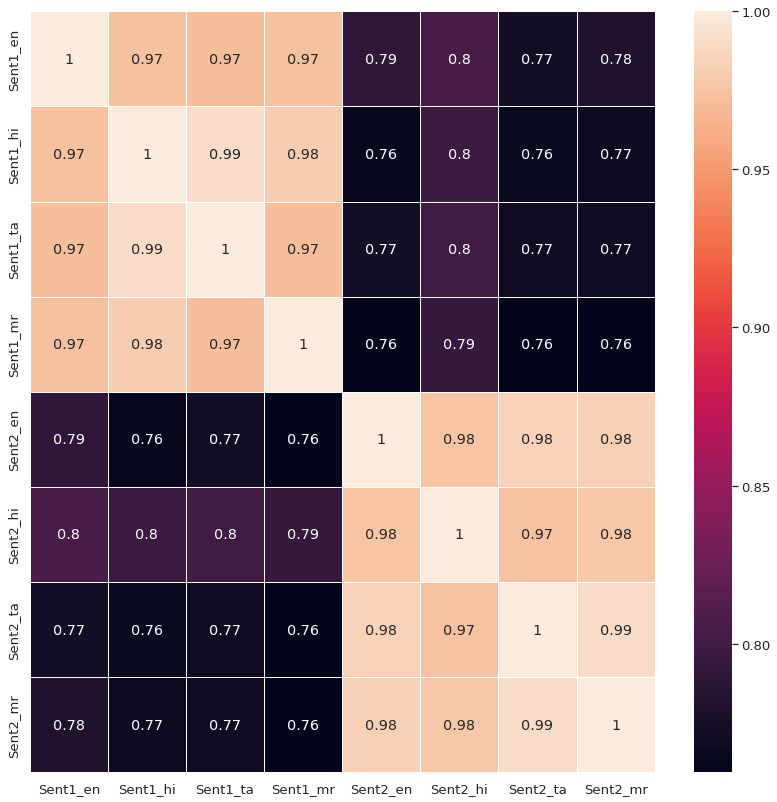

In [4]:
model_name = "pvl/labse_bert" # for mbert use bert-base-multilingual-cased
model,tokenizer = load_model(name=model_name)
sentence_embeddings = calc_embeddings(model,tokenizer,sentences)
print('Dimension of embeddings is {}'.format(sentence_embeddings.shape[1]))
plot_similarity(sentence_embeddings)

LASER Embeddings

In [5]:
!pip install laserembeddings

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 45 kB 869 kB/s            
     |████████████████████████████████| 859 kB 966 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.35-py3-none-any.whl size=883989 sha256=452c0ce676a75926640a9f0c7763c945af5c966efd914ca4610da84cb199eeba
  Stored in directory: /root/.cache/pip/wheels/d1/ff/0e/e00ff1e22100702ac8b24e709551ae0fb29db9ffc843510a64
Successfully built sacremoses
  Attempting uninstall: sacremoses
    Found existing installation: sacremoses 0.0.46
    Uninstalling sacremoses-0.0.46:
      Successfully uninstalled sacremoses-0.0.46


In [6]:
!python -m laserembeddings download-models

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/93langs.fcodes    
✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/93langs.fvocab    
✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/bilstm.93langs.2018-12-26.pt    

✨ You're all set!


In [7]:
from laserembeddings import Laser
laser = Laser()
laser_embeddings = laser.embed_sentences(
    sentences[:],
    lang=['en', 'hi', 'ta','mr']*2)


In [8]:
laser_embeddings.shape

(8, 1024)

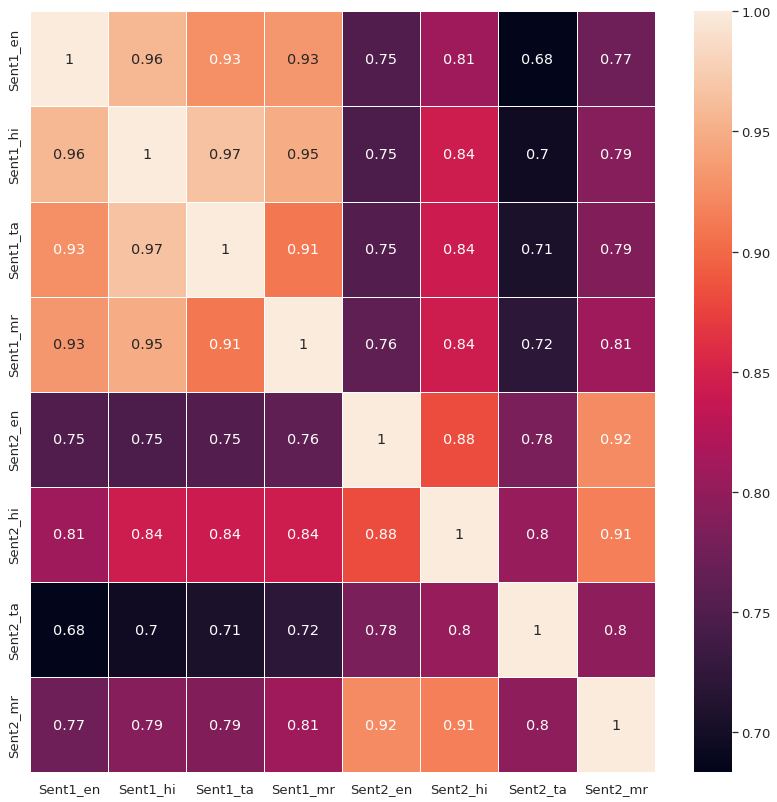

In [9]:
plot_similarity(laser_embeddings)